In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing Libraries

In [3]:
iris=pd.read_csv('iris.csv')

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
iris.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [7]:
#Label
Y=iris['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [8]:
#Features
X=iris.drop(['Id','Species'],axis=1)

In [9]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
#TRAINING of MOdel

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
kmodel=KNeighborsClassifier(n_neighbors=3)

In [14]:
kmodel.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
kmodel.predict([[3.2,2.1,8.9,6.8],[2.1,3.2,3.3,2.1]])

array([2, 1], dtype=int64)

In [16]:
Y_pred=kmodel.predict(X_test)

In [17]:
#EValuting The MOdel
from sklearn.metrics import accuracy_score

In [18]:
s=accuracy_score(Y_pred,y_test)
print("The Accuracy of Kneighbor classifier is",s)

The Accuracy of Kneighbor classifier is 0.9736842105263158


Text(0, 0.5, 'y_test')

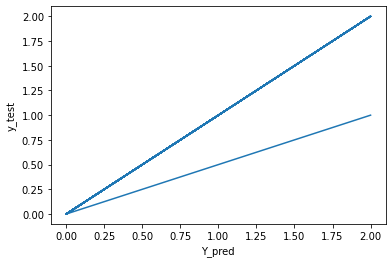

In [19]:
plt.plot(Y_pred,y_test)
plt.xlabel('Y_pred')
plt.ylabel('y_test')

c:\users\sachi\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'SepalLengthCm'}>],
       [<AxesSubplot:title={'center':'SepalWidthCm'}>,
        <AxesSubplot:title={'center':'PetalLengthCm'}>],
       [<AxesSubplot:title={'center':'PetalWidthCm'}>, <AxesSubplot:>]],
      dtype=object)

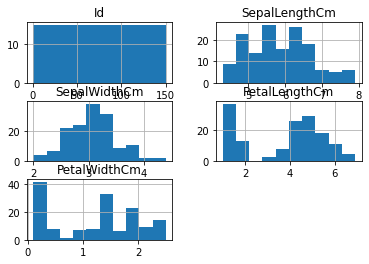

In [20]:
iris.hist()

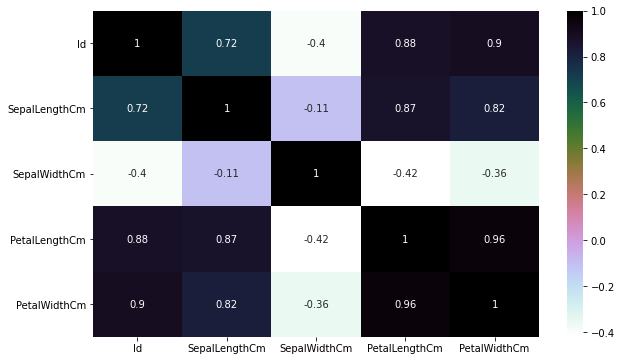

In [21]:
plt.figure(figsize=(10,6)) 
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [23]:
import pickle

In [24]:
pickle.dump(kmodel, open('kmodel.pkl','wb'))

In [25]:
# Loading model to compare the results
#model = pickle.load(open('model.pkl','rb')